# WELCOME TO EXAMPLES ON HOW TO USE OUR REPOSITORY

## PREPROCESSING OF THE DATA

### Compute the Coulomb Matrix for a given molecule

This code is intended to compute the Coulomb matrix of a molecule given its 3D coordinates in a json file, which can be easily obtained from Pubchem oficial site (https://pubchem.ncbi.nlm.nih.gov/). Note that the output is a vector containing the elements of the upper triangular part of the matrix.

In [25]:
from preprocessing.coulomb_matrices import read_json_and_write_csv
molecule = 'data/molecules/glycine.json' #place here the path to your json molecule
matrix = read_json_and_write_csv(molecule)

### Obtain the a CSV of Pubchem Features

Our chemical features were directly downloaded from the Pubchem database. However, we did some slight modifications to obtain a csv with only those features that we considered the most important for our predictions. If you want to do the same to predict with our models you can use the following lines of code:

In [56]:
from data_processing.pubchem_features import clean_pubchem
data = "pubchem.csv" #place here the path to your downloaded csv from pubchem for a set of molecules
clean_data = clean_pubchem(data)

## GROUND STATE ENERGY COMPUTATION

To compute the ground state energy for a given molecule using different strategies use the following function. Note that large molecules may overcome qubit limitations. If that is the case, we recommend you to jump to next section and predict the energy using our machine learning models.

In [ ]:
from quantum_computing.gse import compute_ground_state_energy
import numpy as np
symbols = ["N", "H", "H", "H"] #change this symbols, coordinates and characteristics according to your molecule
coordinates = np.array([0,0,0,0,-0.9366,-0.3816,0.8121,0.4689,-0.3816,-0.8121,0.4689,-0.3816]) 
spin=1
charge=0
method='VQE' #here you can place the following methods: VQE, QPE, HF
energy = compute_ground_state_energy(symbols,coordinates,spin,charge,method)

Step = 0,  Energy = -51.17744080 Ha
Step = 2,  Energy = -51.17805603 Ha
Step = 4,  Energy = -51.17852924 Ha
Step = 6,  Energy = -51.17889305 Ha
Step = 8,  Energy = -51.17917267 Ha
Ground state energy: -51.17928717032435 Hartrees


## MACHINE LEARNING

Here we provide with different models to predict groun state energy values for large molecules. If you run the following code you will obtain the results we obtained in our paper. However, in the last section, you can include the pubchem parameters of your molecule and obtain a prediction the ground state energy. Note that its accuracy might be limited depending on the molecule. Take into account that our dataset was protein related, and all our molecules were constituted by H,O,N,C ans S.

### TRAINING

For the tranning we had three different datasets having differen combinations of features (pubchem, coulomb matrice or a combined one). We also tried three different models - XGBoost, random forest and Light Boost Machine - and tuned they corresponding hyperparameters.
If you have your own dataset of molecules, we encourage you to train our models with it.

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 10, 'n_estimators': 500, 'subsample': 0.6}
Mean RE%: 6.062298035478418
Std RE: 10.789687799106732


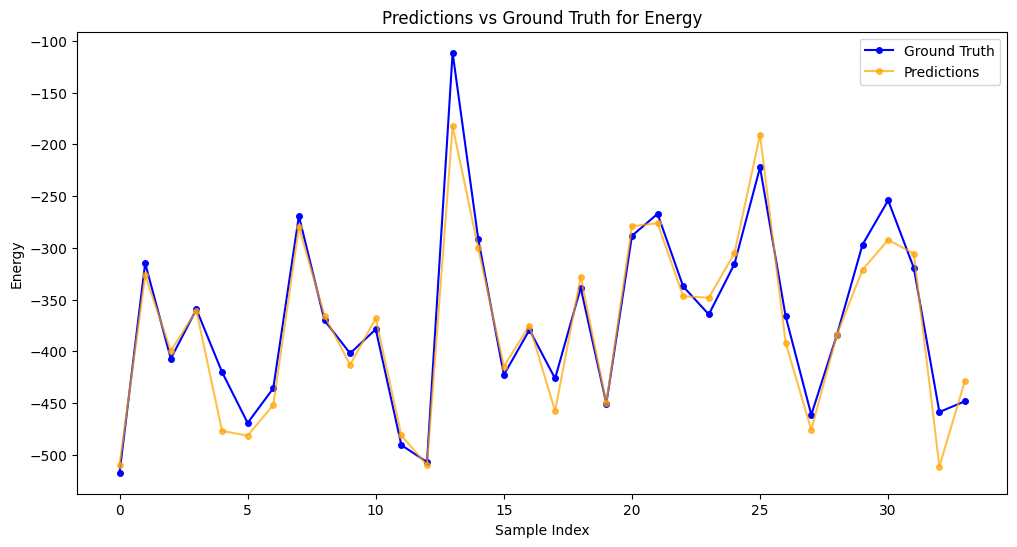

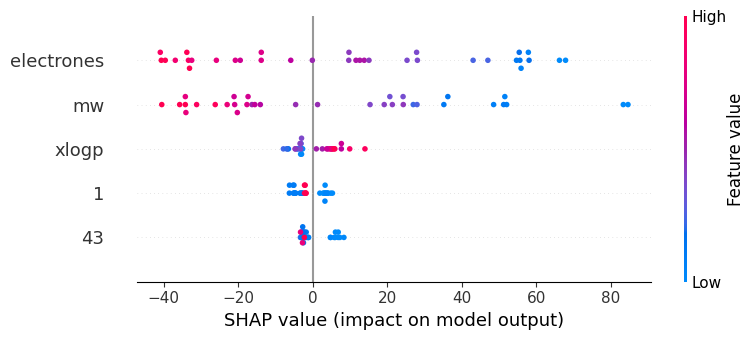

In [ ]:
from ml.train import training
file = "data/training/combined.csv" # here you can change the features by writing pubchem, coulomb or combined
model = "lgbm" #here you can change the model by writing rf, xgb or lgbm
hyperparameters, accuracy, std = training(file,model)

### TESTING

This function takes the previous tuned hyperparameters, fits the model to the previous dataset, and uses this model to predict the energies on the amino acid dataset (test_dataset).
If you wish, you could input any file in the mentioned format to obtain predictions on your own molecules.
Here you may not choose the model because this is automatically selected from the previous training depending on the set of features you introduce.

In [9]:
from ml.test import test
test_set = "data/test/combined.csv" # here you can change the features by writing pubchem, coulomb or combined
hyperparameters, accuracy, std = test(test_set)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5409
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 202
[LightGBM] [Info] Start training from score -392.904588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

### LINEAR REGRESSION

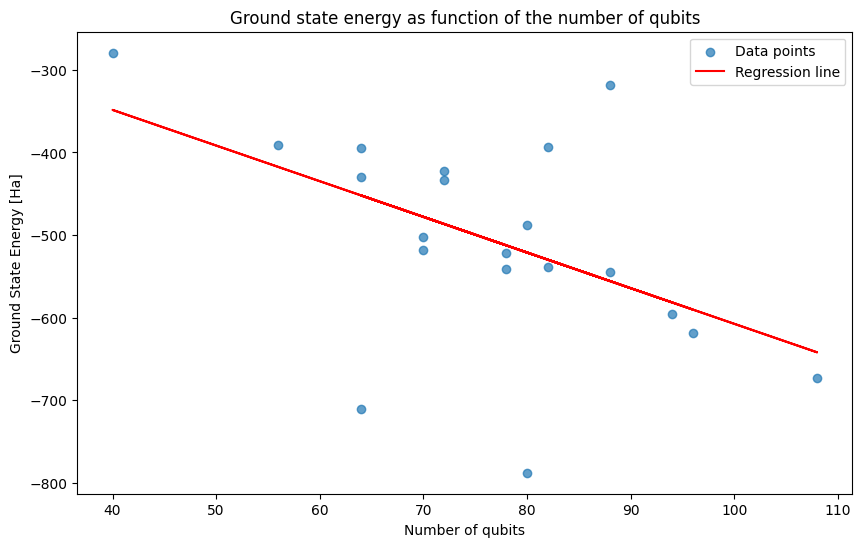

Slope: -4.319463021332967
Intercept: -175.60947147229473
RE%: 15.008125342042229


In [14]:
from machine_learning.linear import *
file = "datasets_corrected/test/pubchem.csv"
slope, intercept, re = fit_linear_model(file)

In [18]:
electrones = 15
new_energy = predict(file, electrones)

ValueError: Expected 2D array, got scalar array instead:
array=15.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.